# Lab 04 -- Polynomial fitting and building a manual toolkit

In this lab, you will implement a machine learning pipeline that will:

* load data from a file
* visualize it
* divide it into training and testing
* perform model selection using cross validation

upon inspecting the cross validation performance, you will need to 

* train and test the selected model
* visualize the model alongside the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To help you debug your code, here is how we generated the data

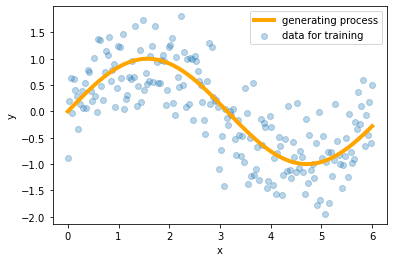

In [2]:
np.random.seed(100)
x = np.linspace(0,6,200)
y_real = np.sin(x)
y_noise = np.sin(x) + np.random.normal(size=x.shape,scale=0.5)

plt.plot(x, y_real, color='orange', lw=4, label='generating process')
plt.scatter(x, y_noise, alpha=0.3, label='data for training')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

import os
if not os.path.exists('datasets/sin/'):
    os.makedirs('datasets/sin/')

pd.DataFrame(np.stack([x, y_noise], axis=1), 
             columns=['x', 'y']).to_csv('datasets/sin/data.csv', index=False)
pd.DataFrame(np.stack([x, y_real], axis=1), 
             columns=['x', 'y']).to_csv('datasets/sin/generating_process.csv', index=False)

# Implementing a machine learning pipeline

Below are a series of functions that you will need to implement.

Each of these functions has a [doctring](https://www.python.org/dev/peps/pep-0257/#what-is-a-docstring) that describes what the function **should** do. 

Your job, is to implement it 😃.

To get the most out of this lab, try to implement the functions yourself, without relying on scikit-learn implementations unless specified in the docstring.

In [3]:
def load_dataset(filename):
    r"""Loads a CSV file
    
    Parameters
    ----------
    filename : str
        The path to the file that will be loaded (In CSV format)
    
    Returns
    -------
    pandas.DataFrame
        A dataframe with the data, the header will be used as columns
        
    Notes
    -----
    This function assumes that the first line of the file is the header
    """
    # your code here (~1 line)

In [4]:
def visualize_dataset(data, title=''):
    r"""Plots a one dimensional dataset
    
    Parameters
    ----------
    data : pandas.DataFrame
        A dataframe containing columns 'x' and 'y'.
    title : str, optional
        Title of the plot, by default an empty title is added to the plot.
    
    Notes
    -----
    the column 'x' from `data` will be used on the x axis of the plot
    and the column 'y' will be used on the y axis of the plot.
    
    'x' and 'y' will be used as labels of the x and y axes respectively.
    """
    # your code here (~5 lines)

In [5]:
def data_split(data, test_percentage=0.3, seed=0):
    r"""Splits a dataset into training and testing
    
    Parameters
    ----------
    data : pandas.DataFrame
        A dataframe containing columns 'x' and 'y'.
    test_perventage : float, optional
        A value between 0 and 1 that indicates the percentage of 
        data points in `data` that will be assiged to the test set.
        By default, this is 0.3
    seed : int, optional
        A value used to set the random state for reproducivle results.
        0 by default.
    
    Returns
    -------
    train, test : pandas.DataFrame, pandas.DataFrame
        A tuple of pandas.DataFrame containing the samples for the train 
        set and test set respectively.
    
    Notes
    -----
    A random permutation of the data is used to keep a similar ditribution
    in the train and test sets.
    
    Example
    -------
    train, test = data_split(data)
    """
    # your code here (~7 lines)

**NOTE:** remember that we are dealing with `pandas.DataFrame` objects.

Look at the documentation for [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [6]:
def data_split_folds(data, folds=5):
    r"""Splits a dataset into `fold` folds for cross validation
    
    Parameters
    ----------
    data : pandas.DataFrame
        A dataframe containing columns 'x' and 'y'.
    folds : int, optional
        The number of folds to be used in the cross-validation.
        5 by default.
    
    Returns
    -------
    list_of_tuples : list
        A list of (train, test) tuples of pandas.DataFrame, each tuple 
        contains all the datapoints in `data` split in a different way.
    
    Notes
    -----
    If the size of the dataset is not exactly divisible by `folds`, the 
    last split will have a smaller test set.
    
    Example
    -------
    folds = data_split_folds(data)
    """
    # your code here (~12 lines)

**NOTE:** feel free to use scikit-learn implementations of these three metrics.

If you feel confident (or if you arrived to this point with more than 45 minutes before the end of the lab), you should try to implement these yourself.

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmse(predictions, labels):
    r"""root mean squared error metric
    
    Parameters
    ----------
    predictions : numpy.array
        an array of predictions
    labels : numpy.array
        Array of correct values
    
    Returns
    -------
    float
        The value of rmse between `predictions` and `labels`
    """
    # your code here (~1 line with scikit-learn)

def mse(predictions, labels):
    r"""mean squared error metric
    
    Parameters
    ----------
    predictions : numpy.array
        an array of predictions
    labels : numpy.array
        Array of correct values
    
    Returns
    -------
    float
        The value of mse between `predictions` and `labels`
    """
    # your code here (~1 line with scikit-learn)

def mae(predictions, labels):
    r"""mean absolute error metric
    
    Parameters
    ----------
    predictions : numpy.array
        an array of predictions
    labels : numpy.array
        Array of correct values
    
    Returns
    -------
    float
        The value of mae between `predictions` and `labels`
    """
    # your code here (~1 line with scikit-learn)

In [8]:
def evaluate_cross_validation(folds, models, metrics):
    r"""Trains and evaluates every model in `models` with
    every metric in `metrics`
    
    Parameters
    ----------
    folds : list of tuples of pandas.DataFrame
        Each element of the list must contain a train, and test 
        dataframe
    models : dict 
        A dictionary with string keys with the names of the models, 
        and a scikit-learn model as the value
    metrics : dict
        A dictionary with the name of the metric as the key
        and a callable function f(predictions, labels) as the value
    
    Returns
    -------
    pandas.DataFrame
        A pandas.DataFrame with columns: 
        
        * 'model' (the model name)
        * 'metric' (the metric name)
        * 'fold' (the fold number)
        * 'metric_value' (the metric calculated on the fold's test set)
    """
    # your code here (~11 lines)

**NOTE:** implementing `model_comparison` below requires some pandas experience.

Look at the documentation of [groupby] and [pivot].

***DO NOT WASTE TIME HERE***

If you can't implement this one in under 10 minutes ***ASK FOR AN EXPLANATION***
or calculate the averages without pandas. The solution will be available next week.

In [9]:
def model_comparison(cross_validation_data):
    r"""For every model, calculates the average of every metric across the folds 
    
    Parameters
    ----------
    cross_validation_data : pandas.DataFrame
        a pandas.DataFrame with the format described in `evaluate_cross_validation`
    
    Returns
    -------
    pandas.DataFrame
        a dataframe where the rows are the metrics, the columns are the models, 
        and the values are the average metric for each model across the folds in 
        `cross_validation_data`
    """
    # your code here (~1 line with pandas)

In [10]:
def visualize_model(data, model, title=''):
    r"""Plots a dataset alongside a model
    
    Parameters
    ----------
    data : pandas.DataFrame
        A dataframe containing columns 'x' and 'y'.
    model : scikit-learn model
        A trained model that can be used to make predictions.
    title : str, optional
        Title of the plot, by default an empty title is added to the plot.
    
    Notes
    -----
    the column 'x' from `data` will be used on the x axis of the plot
    and the column 'y' will be used on the y axis of the plot.
    
    The model will be used to predict a value of y for every value of x
    included in `data`, and then it will be plotted as a scatter of points.
    
    'x' and 'y' will be used as labels of the x and y axes respectively.
    """
    # your code here (~7 lines)

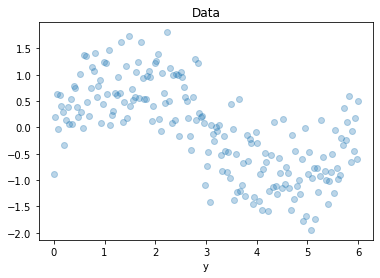

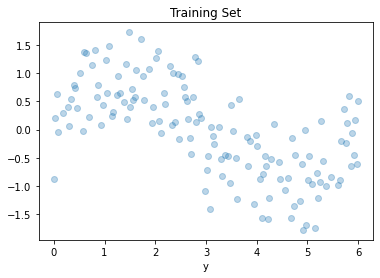

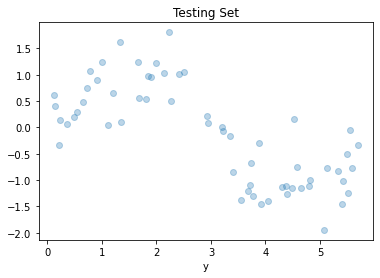

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

models = {}
for degree in range(3, 16, 3):
    models[f'Polynomial Fit {degree} degrees'] = make_pipeline(PolynomialFeatures(degree), LinearRegression())

metrics = {
    'mean squared error': mse, 
    'root mean squared error': rmse, 
    'mean absolute error': mae
}

data = load_dataset('datasets/sin/data.csv')
visualize_dataset(data, 'Data')
train, test = data_split(data)
visualize_dataset(train, 'Training Set')
visualize_dataset(test, 'Testing Set')
k_folds = data_split_folds(train, 5)
cv_data = evaluate_cross_validation(k_folds, models, metrics)
model_comp = model_comparison(cv_data)

In [12]:
cv_data.head()

,model,metric,fold,metric_value
0,Polynomial Fit 3 degrees,mean squared error,0,0.487816
1,Polynomial Fit 3 degrees,root mean squared error,0,0.237964
2,Polynomial Fit 3 degrees,mean absolute error,0,0.400307
3,Polynomial Fit 3 degrees,mean squared error,1,0.529388
4,Polynomial Fit 3 degrees,root mean squared error,1,0.280251


In [13]:
model_comp

metric_value                            \
model                   Polynomial Fit 12 degrees Polynomial Fit 15 degrees   
metric                                                                        
mean absolute error                      0.462989                  0.477975   
mean squared error                       0.560683                  0.588814   
root mean squared error                  0.321078                  0.355446   

                                                                           \
model                   Polynomial Fit 3 degrees Polynomial Fit 6 degrees   
metric                                                                      
mean absolute error                     0.435064                 0.442428   
mean squared error                      0.520383                 0.533630   
root mean squared error                 0.275394                 0.289589   

                                                  
model                   Polynomial Fit 9 degrees  
metric                                            
mean absolute error                     0.445623  
mean squared error                      0.539952  
root mean squared error                 0.297232

Look at the values in `model_comp` and choose the model that has the best performance in your opinion, and plot below.
This is not an exercise anymore, you can simply look at the differences between the models now

Test set performance
mean squared error       : 0.491067151586049
root mean squared error  : 0.24114694736683567
mean absolute error      : 0.39654990700957415


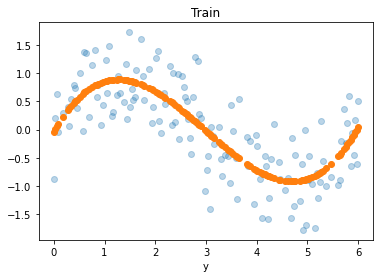

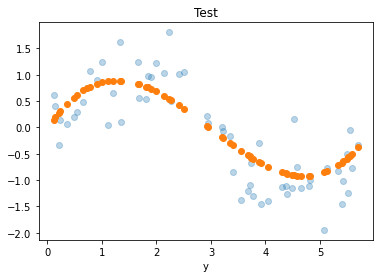

In [14]:
best_performance = '' # pick one of the models by the key in the `models` dictionary

models[best_performance].fit(train[['x']], train['y'])
pred = models[best_performance].predict(test[['x']])
print('Test set performance')
for name, metric in metrics.items():
    print(f"{name:25}: {metric(pred, test['y'])}")
visualize_model(train, models[best_performance], 'Train')
visualize_model(test, models[best_performance], 'Test')